In [5]:
width = 4
height = 4
import numpy as np
import matplotlib.pyplot as plt

kernel2D = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])
np.set_printoptions(linewidth=1000)

In [6]:
def get_indices(index, k, width, height):
    res = []
    difs = np.arange(- (k // 2), k // 2 + 1)
    
    for y in difs:
        for x in difs:
            num = index + x + y * width
            if num // width > (num - x) // width:
                num -= width
            elif num // width < (num - x) // width:
                num += width

            num %= width * height
            res.append(num)

    return res
get_indices(1, 3, 5, 5)

[20, 21, 22, 0, 1, 2, 5, 6, 7]

In [7]:
def visualize_CreateBlurMatrix(kernel2D, width, height):
    n = width * height
    image = np.full(shape=(n,), fill_value="")
    A = np.zeros(shape=(n, n))
    k = kernel2D.shape[0]
    for i in range(n):
        indices = list(get_indices(i, k, width, height))
        image[indices] = kernel2D.flatten()
        print_image_display(image, width, height)
        print('\n')
        image[indices] = ''

def print_image_display(image, width, height):
    for i in range(height):
        print(str(image[i * width: i * width + width]).replace("''", ' . ').replace("'", ' '))


visualize_CreateBlurMatrix(kernel2D, 12, 12)

[ 5   6   .   .   .   .   .   .   .   .   .   4 ]
[ 8   9   .   .   .   .   .   .   .   .   .   7 ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ 2   3   .   .   .   .   .   .   .   .   .   1 ]


[ 4   5   6   .   .   .   .   .   .   .   .   . ]
[ 7   8   9   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . ]
[ .   .   .   .   .   .   .   .   .   .   .   . 

In [8]:
def CreateBlurMatrix(kernel2D, width, height):
    n = width * height
    A = np.zeros(shape=(n, n))
    k = kernel2D.shape[0]

    def get_indices(index, k, width, height):
        res = []
        difs = np.arange(- (k // 2), k // 2 + 1)

        for y in difs:
            for x in difs:
                num = index + x + y * width
                if num // width > (num - x) // width:
                    num -= width
                elif num // width < (num - x) // width:
                    num += width

                num %= width * height
                res.append(num)

        return res

    for i in range(n):
        indices = get_indices(i, k, width, height)
        A[i][indices] = kernel2D.flatten()

    return A

print(str(CreateBlurMatrix(kernel2D, 5, 5)))

[[5. 6. 0. 0. 4. 8. 9. 0. 0. 7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 3. 0. 0. 1.]
 [4. 5. 6. 0. 0. 7. 8. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 0. 0.]
 [0. 4. 5. 6. 0. 0. 7. 8. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 0.]
 [0. 0. 4. 5. 6. 0. 0. 7. 8. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3.]
 [6. 0. 0. 4. 5. 9. 0. 0. 7. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 1. 2.]
 [2. 3. 0. 0. 1. 5. 6. 0. 0. 4. 8. 9. 0. 0. 7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 3. 0. 0. 4. 5. 6. 0. 0. 7. 8. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0. 0. 4. 5. 6. 0. 0. 7. 8. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0. 4. 5. 6. 0. 0. 7. 8. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 0. 0. 1. 2. 6. 0. 0. 4. 5. 9. 0. 0. 7. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 3. 0. 0. 1. 5. 6. 0. 0. 4. 8. 9. 0. 0. 7. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 2. 3. 0. 0. 4. 5. 6. 0. 0. 7. 8. 9. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 2. 3. 0. 0. 4. 5. 6. 0. 0. 7. 8. 9. 0. 0.

[[1.35646814e-78 1.86320714e-77 2.45890020e-76 ... 2.45890020e-76 1.86320714e-77 1.35646814e-78]
 [1.86320714e-77 2.55924982e-76 3.37747735e-75 ... 3.37747735e-75 2.55924982e-76 1.86320714e-77]
 [2.45890020e-76 3.37747735e-75 4.45730352e-74 ... 4.45730352e-74 3.37747735e-75 2.45890020e-76]
 ...
 [2.45890020e-76 3.37747735e-75 4.45730352e-74 ... 4.45730352e-74 3.37747735e-75 2.45890020e-76]
 [1.86320714e-77 2.55924982e-76 3.37747735e-75 ... 3.37747735e-75 2.55924982e-76 1.86320714e-77]
 [1.35646814e-78 1.86320714e-77 2.45890020e-76 ... 2.45890020e-76 1.86320714e-77 1.35646814e-78]]


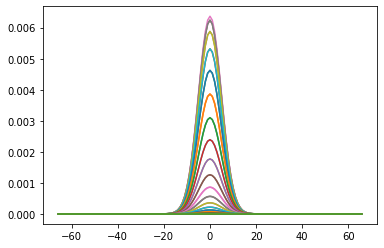

In [9]:
def Gaussian2D(k, sigma):
    kernel2D = np.zeros(shape=(k, k))
    x_values = np.arange(- (k // 2), k // 2 + 1)
    y_values = np.arange(- (k // 2), k // 2 + 1)

    for i in range(len(x_values)):
        for j in range(len(y_values)):
            x = x_values[i]
            y = y_values[j]
            kernel2D[i, j] = np.exp(- (x ** 2 + y ** 2) /
                                    (2 * sigma ** 2)) / (2 * np.pi * sigma**2)

    return kernel2D

k = 133
y = Gaussian2D(k, 5)

x = np.arange(- (k // 2), k // 2 + 1)

print(y)

plt.plot(x, y)
plt.show()


In [10]:
def get_neighbors(index, k, width, height):
    res = []
    difs = np.arange(- (k // 2), k // 2 + 1)

    for y in difs:
        for x in difs:
            num = index + x + y * width
            if num // width > (num - x) // width:
                num -= width
            elif num // width < (num - x) // width:
                num += width

            num %= width * height
            res.append(num)

    return np.array(res)


In [11]:
print(get_neighbors(0, k=3, width=5, height=5))
print(kernel2D.flatten())

[24 20 21  4  0  1  9  5  6]
[1 2 3 4 5 6 7 8 9]


In [14]:
lambda_ = 3
r = 4
lambda_**2*np.eye(4).T @ np.eye(r)

array([[9., 0., 0., 0.],
       [0., 9., 0., 0.],
       [0., 0., 9., 0.],
       [0., 0., 0., 9.]])